In [1]:
# 1. Importing all Libraries:
# numpy is a python libarary used for numerical calculations 
import numpy as np
# pandas is a python libarary used for manuplating the data by converting the data into dataframes. 
import pandas as pd
# matplotlib is a python libary used for visualztion
import matplotlib.pyplot as plt
# the default styles for every plot element 
from matplotlib import rcParams
# used for color maps 
from matplotlib.cm import rainbow
# sklearn is a python libarary for ml- 
# TSNE is a tool to visualize high-dimensional data
from sklearn.manifold import TSNE
# seabon is a python libaray for advanced viuals 
import seaborn as sns
# to hide any warning messages 
import warnings
warnings.filterwarnings('ignore')
# to measure the accuracy
from sklearn import metrics
# used in features selection
from sklearn.decomposition import PCA
# used for standardization
from sklearn.preprocessing import StandardScaler
# to determine the performance of the classification models for a given set of test data
from sklearn.metrics import classification_report
# used for handling train and test data and for getting additional information
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold

In [2]:
# import KNeighorsClassifier is to use Knn
from sklearn.neighbors import KNeighborsClassifier
#  import DecisionTreeClassifier is to use  Decision Tree 
from sklearn.tree import DecisionTreeClassifier

## Data Collection

In [3]:
# read the data using pd.read_csv and converting it to dataframe 
data = pd.read_csv("C:\\Users\\kirol\\Desktop\\#DEBI\\#data programing\\project2\\data\\Data set 6 (12 KB) - heart_disease.csv.csv")

## Data Prepocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#print the first 10 rows 
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
#print the shape of the data 303 recoreds "rows" and 14 columns "features"
data.shape

(303, 14)

In [7]:
#quick statistical measures
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Cleaning

In [8]:
# check the null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Explarotry analysis using data viuslization

______   the data is clean and there no missing values 

In [9]:
# to display the number of samples on each class
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

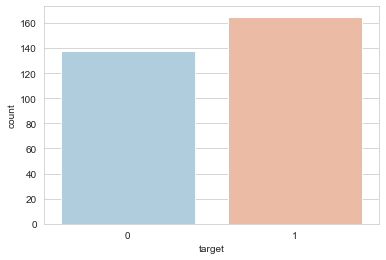

In [10]:
#checking class skewness (data imbalance)
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r');

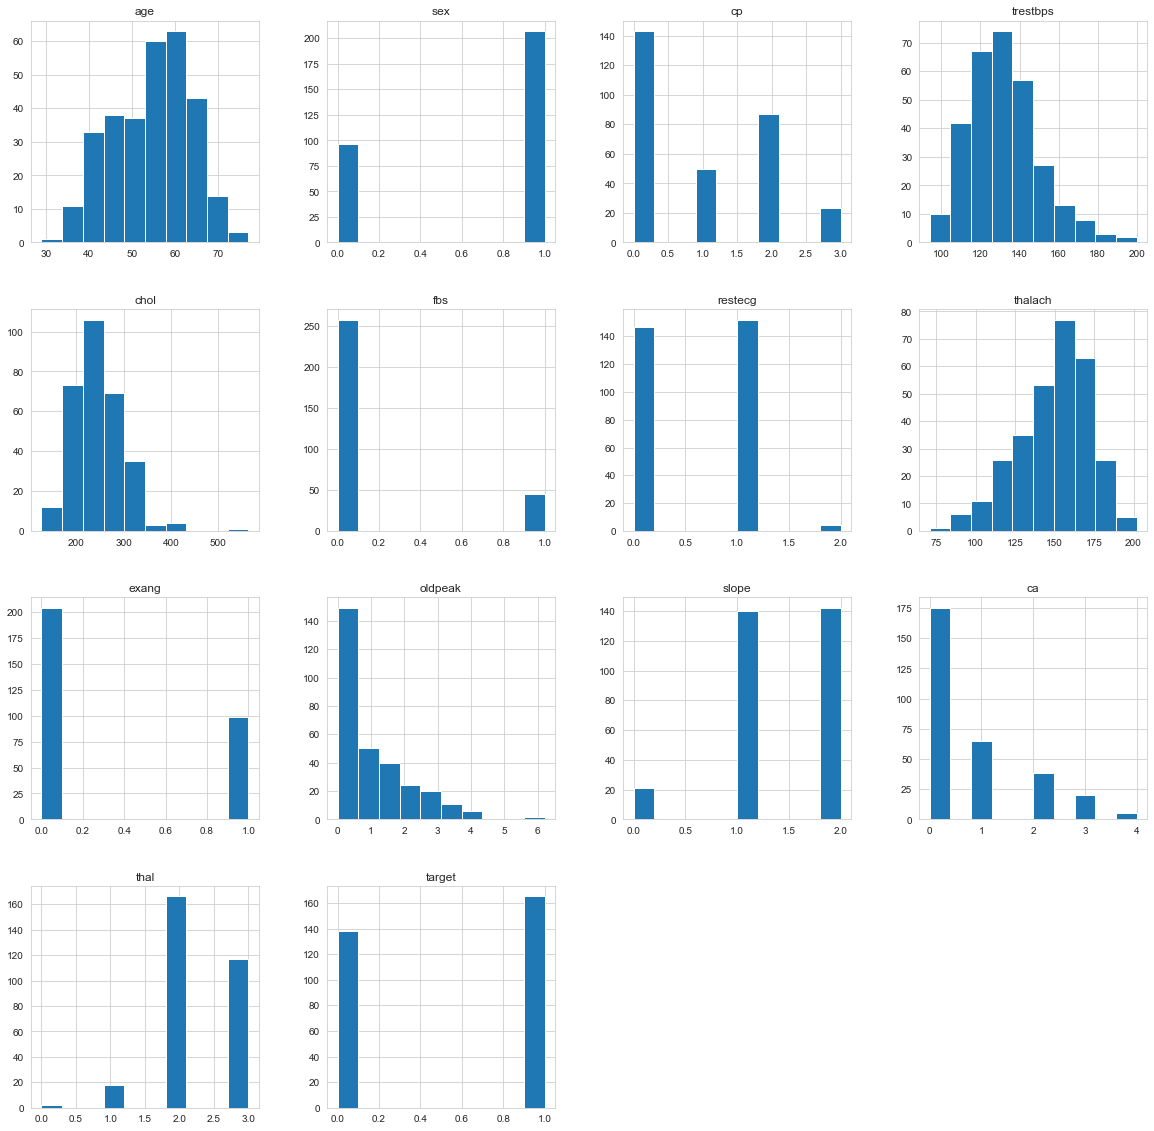

In [11]:
#show the distbrution of the dataset
data.hist(figsize=(20,20));

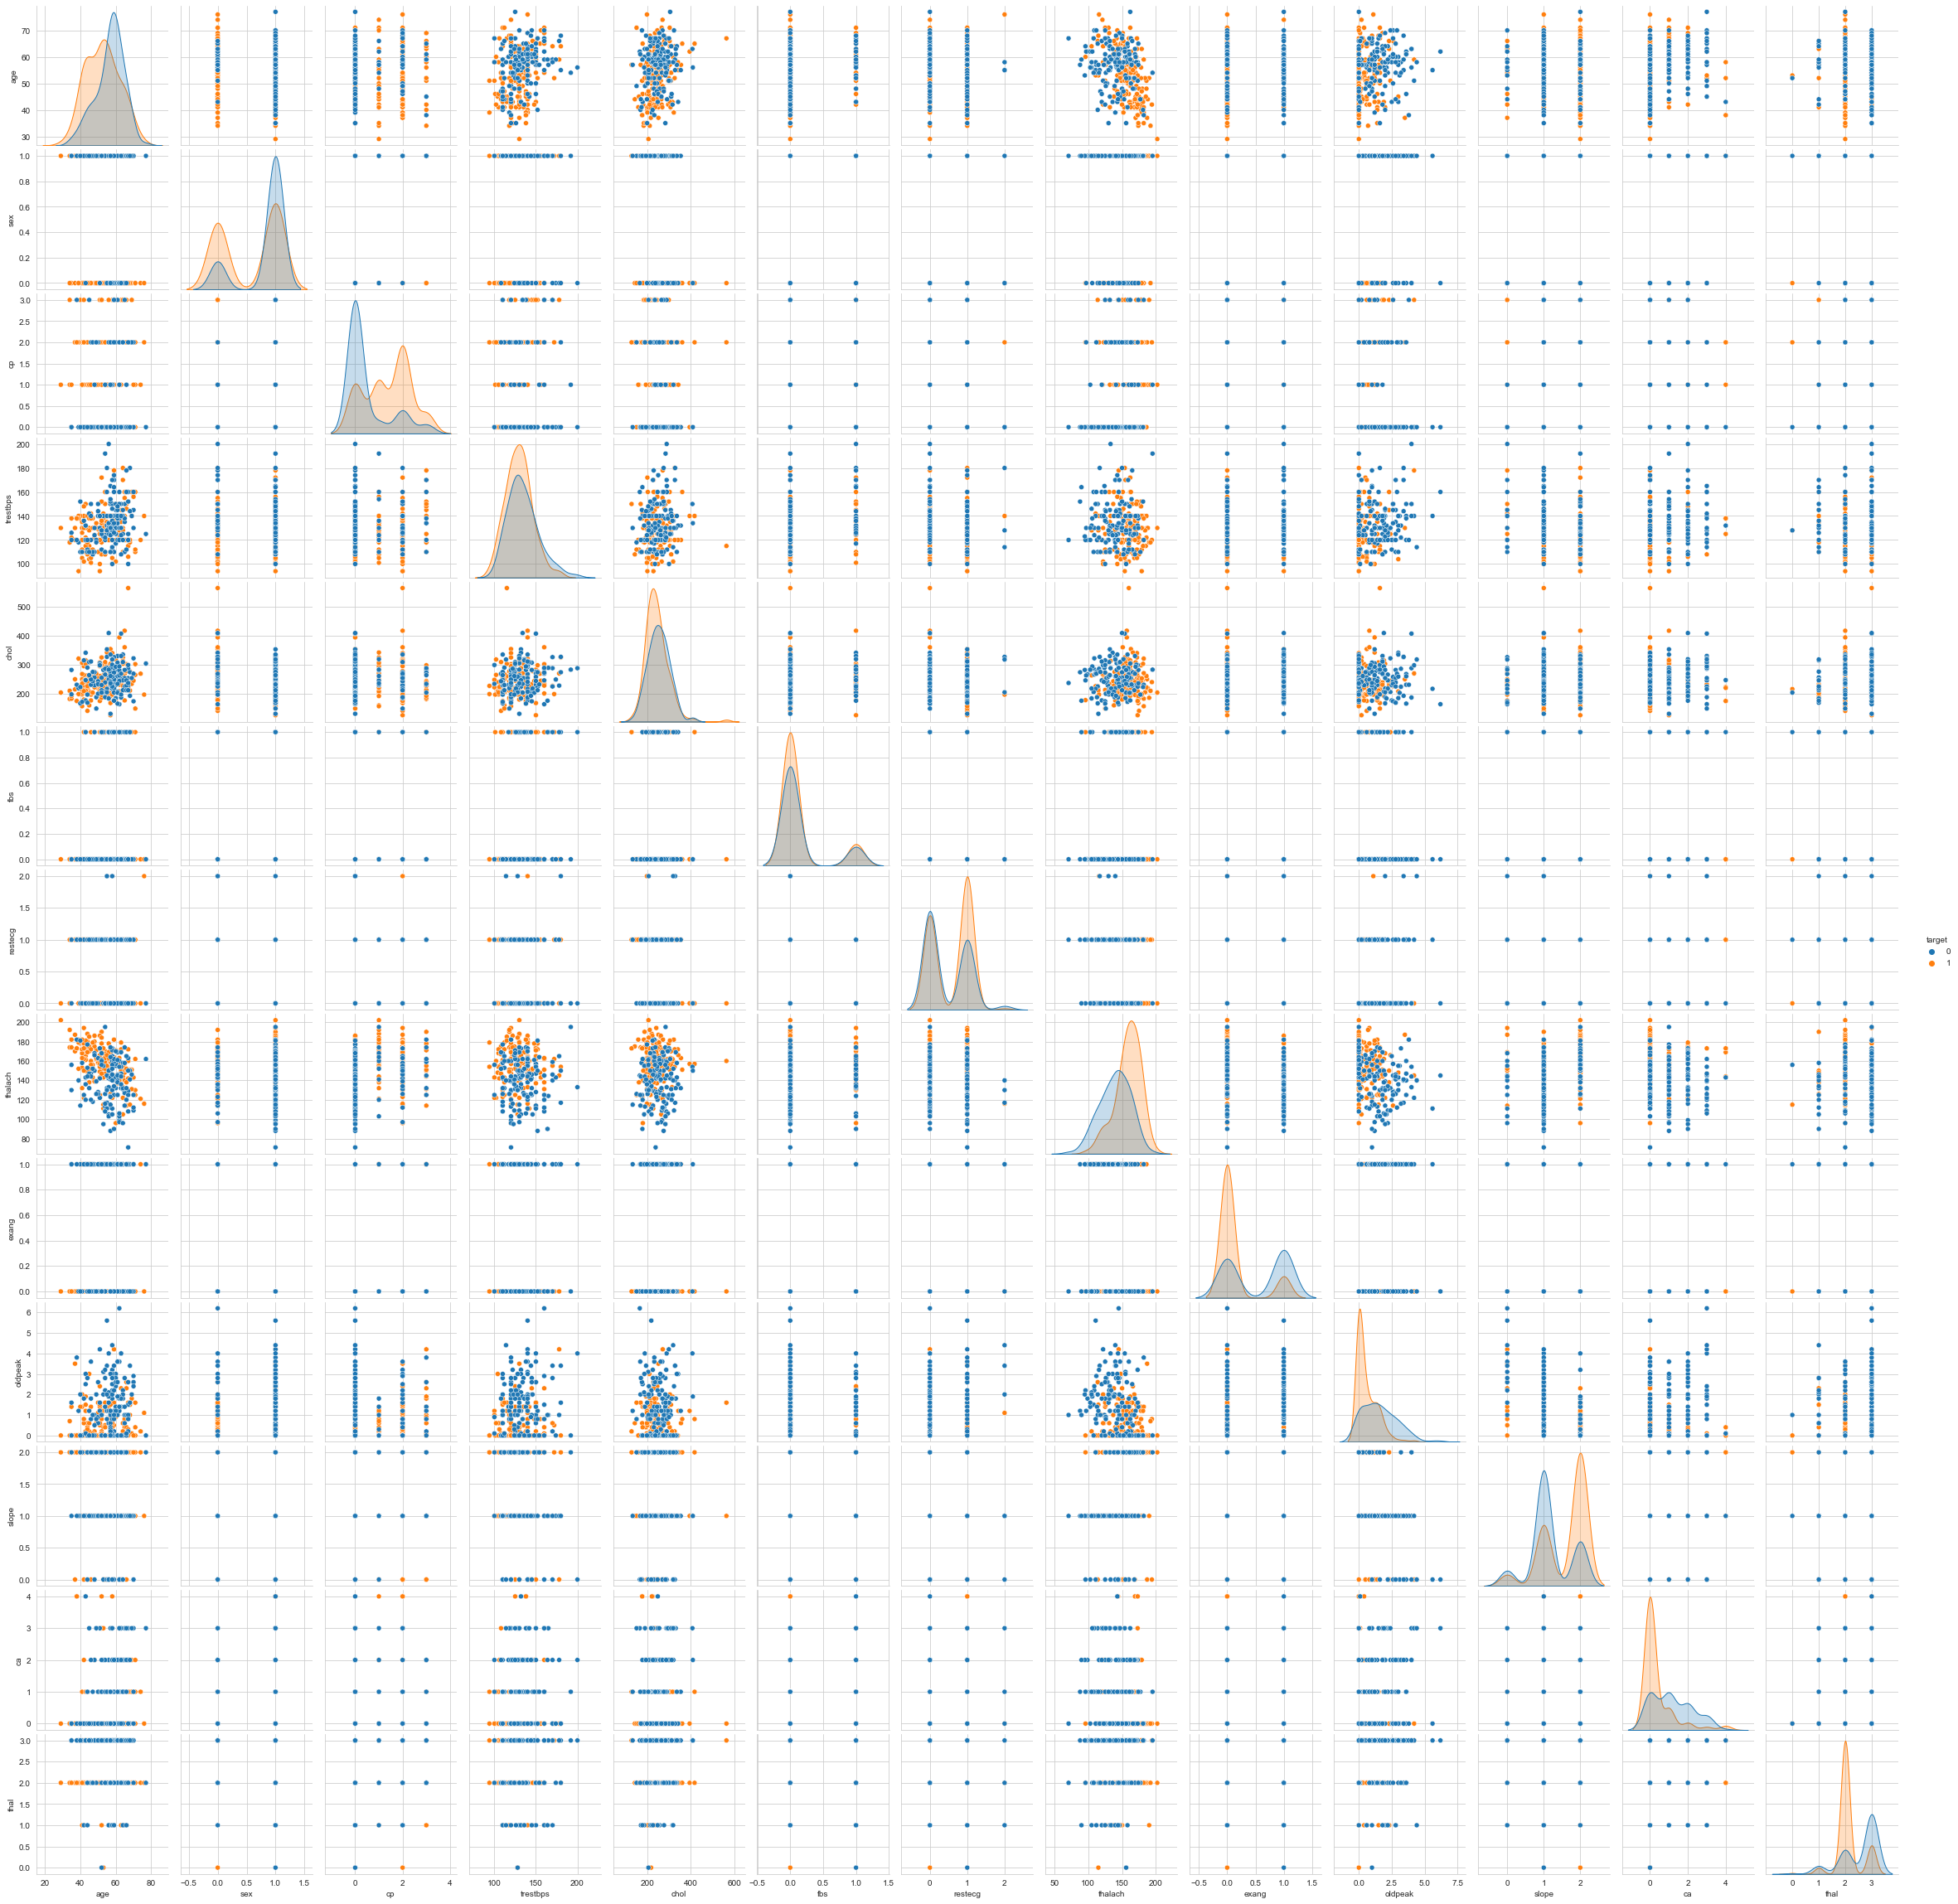

In [12]:
#the interrelationships between the features
sns.pairplot(data, hue='target');

Text(0.5, 1.0, 'Boxplot of Features')

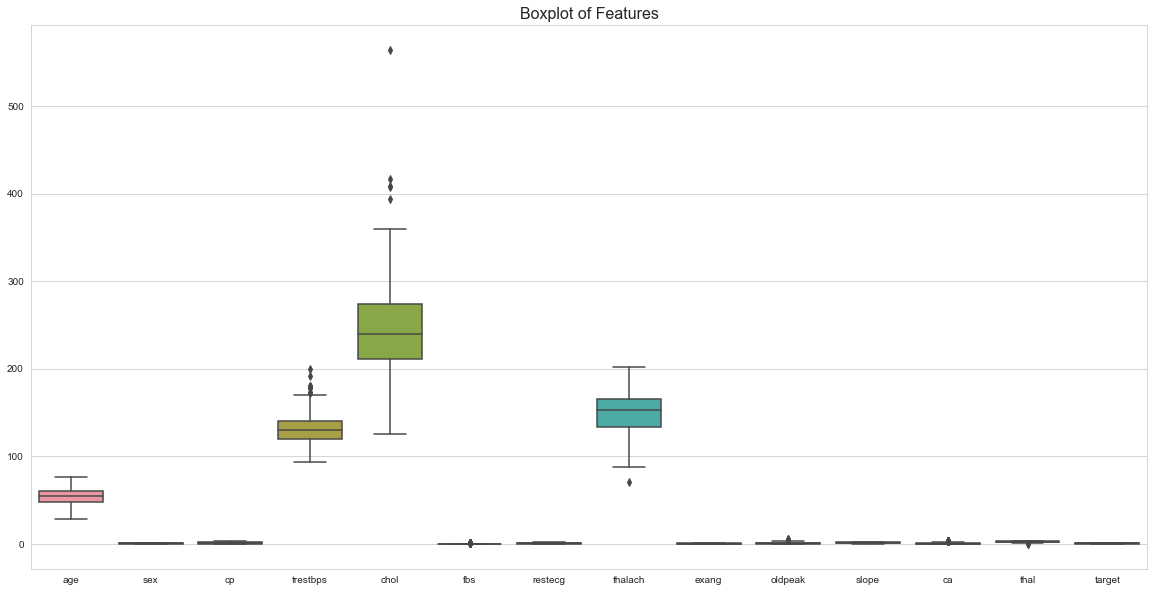

In [13]:
#boxplot of predictors
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.title('Boxplot of Features', size=16)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.001s...
[t-SNE] Computed neighbors for 303 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 9.258190
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.928013
[t-SNE] KL divergence after 1000 iterations: 0.581322


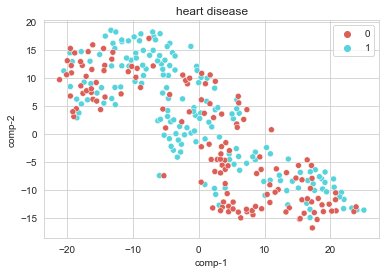

In [14]:
#dimention reduction to reduce the dataset to 2D to be able to visualise it 
tsne = TSNE(n_components=2, verbose=1, random_state=123)
#dimention reduction to reduce the dataset to 2D to be able to visualise it 
z = tsne.fit_transform(data.iloc[:,:-1]) 
df = pd.DataFrame()

df["y"] =data.iloc[:,-1]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
# to show the data 
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
               palette=sns.color_palette("hls", 2),
               data=df).set(title="heart disease") ;

this graph shows the data have denormalized dataset and neended to be normailzed 

In [15]:
#the corr shows the affect of the variables on each other and the target "outcome " variable 
# First calcuate the correlation
correlation = data.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

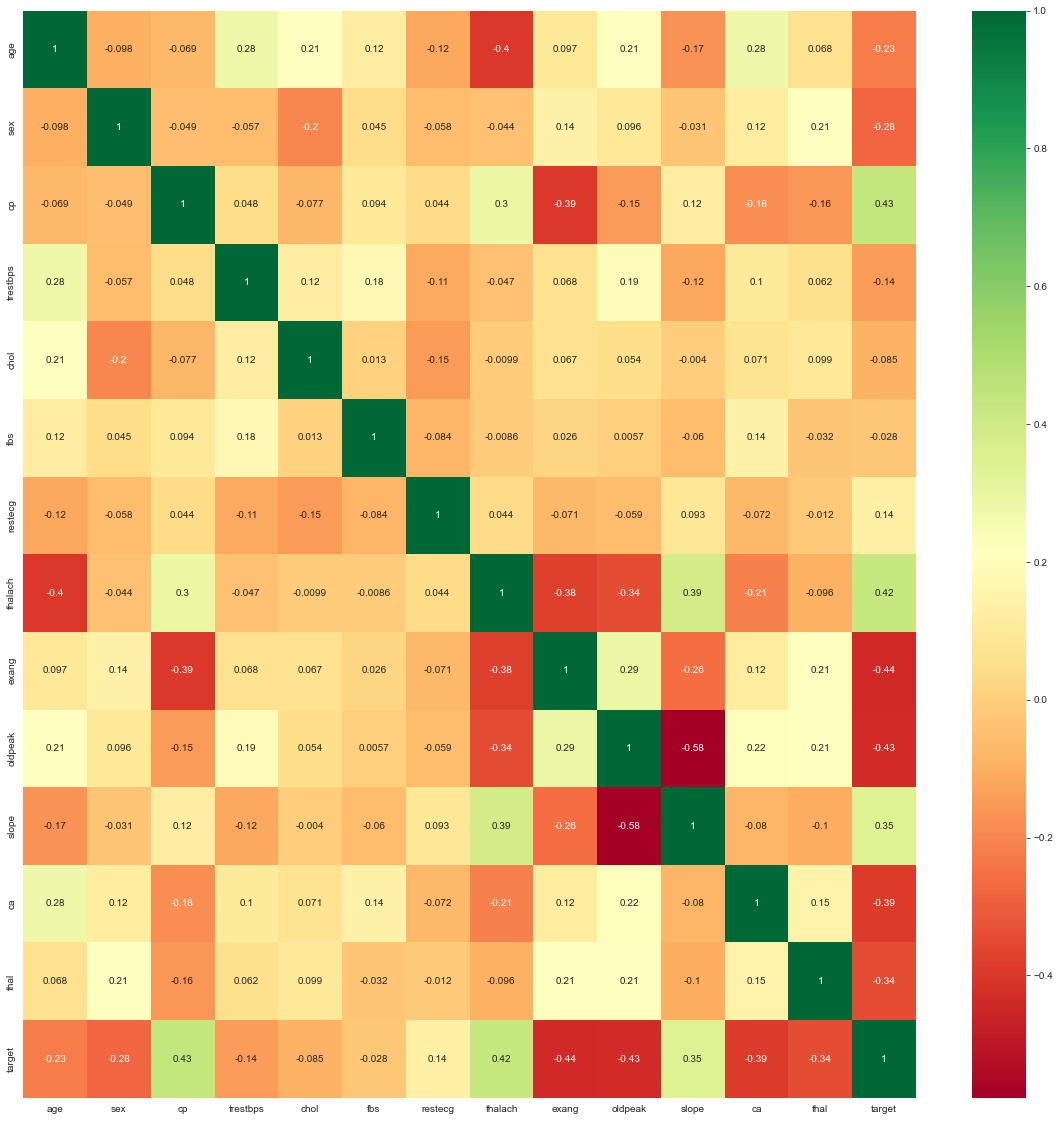

In [16]:
#get correlations of each features in dataset
corr_mat = data.corr()
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

In [17]:
# Recheck the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data pre_processing

In [18]:
#focus on features that needed to be normailzed 
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [19]:
#dimention reduction to reduce the dataset to 2D to be able to visualise it
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [20]:
#print the first 5 rows of the data 
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## features selection, dimension reduction  & data preprocessing

In [21]:
#According to the correlation between  each value and the target value we can remove the least correlated.
data.drop(["chol","fbs",'trestbps','restecg'], axis=1, inplace=True)

In [22]:
#y is the desired outcome - the column that we want to predict 
y = dataset['target']
# the input columns 
X = dataset.drop(['target'], axis = 1)

In [23]:
#Splitting the dataset to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [24]:
#feature selection based on 90 % of the data variance to increase the accuarcy using "Principal Component Analysis" PCA 
pca = PCA(n_components=.9)
#fiting the the new features  
#It is used to reduce the number of dimensions in healthcare data. 
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [25]:
pca.n_components_

12

## KNN model 

### Fitting the KNn model 

In [26]:
#for knowing the best K we will ittrate and compairing the resuls
k_range = range(1,21)
scores = {}
scores_list = []
for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors= k,metric='minkowski', p=2)
    knn_classifier.fit(x_train_pca,Y_train)
    Y_pred = knn_classifier.predict(x_test_pca)
    scores[k] = metrics.accuracy_score(Y_test, Y_pred)
    scores_list.append(metrics.accuracy_score(Y_test, Y_pred))

In [27]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



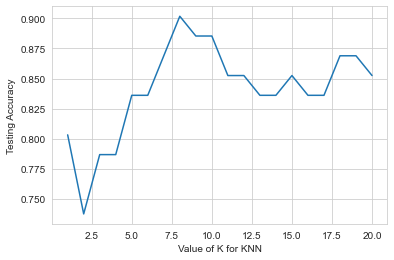

In [28]:
#visualisation

%matplotlib inline
#plot the relationship between K & and Testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy');

k = 8 is the optimal choice 

In [29]:
#here we will choose 8 for K value
knn_classifier2 = KNeighborsClassifier(n_neighbors= 8, metric='minkowski', p=2)
knn_classifier2.fit(x_train_pca, Y_train)
Y_pred = knn_classifier2.predict(x_test_pca)

In [30]:
#mrix used to determine the performance of the classification models for a given set of test data


print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.94      0.88      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [31]:
#the result of each slice:
knn_classifier = KNeighborsClassifier(n_neighbors = 15)
knn_score=cross_val_score(knn_classifier,X,y,cv=10)
print(knn_score)

[0.90322581 0.80645161 0.87096774 0.93333333 0.83333333 0.73333333
 0.83333333 0.83333333 0.76666667 0.76666667]


In [32]:
# the mean of the cvs 
knn_score.mean()

0.8280645161290323

In [33]:
#estimate the skill of a machine learning model on unseen data -  
#the score tell us there is no overfitting problem in our data 
#when is the score.var is minimze will be better 
knn_score.var()

0.0035635217944271014

## decision tree model

In [34]:
# Testing to get the best k (max_depth) between decistion tree modles
# there is two model in decistion tree 
#- gini 
#-entropy 
for k in range(1,10):
    dt= DecisionTreeClassifier (criterion='gini' , max_depth=k ,random_state=123)
    dt.fit(x_train_pca,Y_train)
    y_pred=dt.predict(x_test_pca)
    print('gini','    max_depth=',f'{k}         {metrics.accuracy_score(Y_test, y_pred)}')
    #print(classification_report(Y_test, y_pred))
    #max_depth use cases : allows to get a trade-off between an under-fitted and over-fitted decision tree
for k in range(1,10):
    dt= DecisionTreeClassifier (criterion='entropy' , max_depth=k ,random_state=123)
    dt.fit(x_train_pca,Y_train)
    y_pred=dt.predict(x_test_pca)
    print('entropy',' max_depth=',f'{k}         {metrics.accuracy_score(Y_test, y_pred)}')
    #print(classification_report(Y_test, y_pred))
    

gini     max_depth= 1         0.8032786885245902
gini     max_depth= 2         0.8032786885245902
gini     max_depth= 3         0.8360655737704918
gini     max_depth= 4         0.819672131147541
gini     max_depth= 5         0.8524590163934426
gini     max_depth= 6         0.7868852459016393
gini     max_depth= 7         0.7868852459016393
gini     max_depth= 8         0.8032786885245902
gini     max_depth= 9         0.7540983606557377
entropy  max_depth= 1         0.8032786885245902
entropy  max_depth= 2         0.8032786885245902
entropy  max_depth= 3         0.8032786885245902
entropy  max_depth= 4         0.8032786885245902
entropy  max_depth= 5         0.8032786885245902
entropy  max_depth= 6         0.7868852459016393
entropy  max_depth= 7         0.6885245901639344
entropy  max_depth= 8         0.6885245901639344
entropy  max_depth= 9         0.7377049180327869


after comparing the two models the accuarcy in gini with max_depth = 5 is higher !. 

In [35]:
dt= DecisionTreeClassifier (criterion='gini' , max_depth=5 ,random_state=123)
dt.fit(x_train_pca,Y_train)
y_pred=dt.predict(x_test_pca)
print(f'  {metrics.accuracy_score(Y_test, y_pred)}')
print(classification_report(Y_test, y_pred))

  0.8524590163934426
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [36]:
# calculate the Decision tree cross-validation score
dt_score=cross_val_score(dt,X,y,cv=10)
dt_score

array([0.83870968, 0.77419355, 0.87096774, 0.83333333, 0.7       ,
       0.7       , 0.53333333, 0.8       , 0.7       , 0.73333333])

In [37]:
# the mean of the cvs 
dt_score.mean()

0.7483870967741936

In [38]:
#estimate the skill of a machine learning model on unseen data -  
#the score tell us there is no overfitting problem in our data 
#when is the score.var is minimze will be better 
dt_score.var()

0.008722858133888314